# ETF5912 Group Assignment - Bank Churn Prediction Analysis

#### GROUP S Tuguldur Ganbat 33762740 Tran Hoang Phuong Le 34044396 Chaoyan Yu 32815719

#### 2024-10-17

# Introduction

In this report, we explore the Bank Churn dataset to predict customer
churn, defined as a customer leaving the bank. Our research question is:
**Which variable shows the strongest correlation with the Exited
variable, and which modeling approach—classification tree or logistic
regression—offers higher accuracy?** The dataset contains customer
demographics, account details, and behavior attributes, which we will
use to perform binary classification.

#### Hypothesis 1: Correlation with Exited Variable

**Null Hypothesis (H0)**: There is no significant correlation between
any variable and the “Exited” variable (customer churn).

**Alternative Hypothesis (H1)**: At least one variable has a significant
correlation with the “Exited” variable (customer churn).

This hypothesis will be tested by analyzing the strength of correlation
between the numerical variables and the “Exited” variable, with the aim
of identifying the strongest predictor of customer churn.

#### Hypothesis 2: Accuracy of Modeling Methods

**Null Hypothesis (H0)**: There is no significant difference in the
accuracy between the classification tree and logistic regression models
for predicting customer churn.

**Alternative Hypothesis (H1)**: One of the models—either the
classification tree or logistic regression—has significantly higher
accuracy in predicting customer churn.

# Data Description

The dataset includes a training file (train.csv) and a test file
(test.csv). The target variable is Exited, indicating whether a customer
has left the bank (1) or stayed (0).

The dataset consists of the following variables (Data Dictionary):

-   **CustomerId**: Unique ID for each customer

-   **Surname**: Customer’s surname

-   **CreditScore**: Customer’s credit score

-   **Geography**: Country of residence

-   **Gender**: Customer’s gender

-   **Age**: Customer’s age

-   **Tenure**: Number of years the customer has been with the bank

-   **Balance**: Customer’s bank balance

-   **NumOfProducts**: Number of bank products held by the customer

-   **HasCrCard**: Whether the customer has a credit card (1 = Yes, 0 =
    No)

-   **IsActiveMember**: Whether the customer is an active member (1 =
    Yes, 0 = No)

-   **EstimatedSalary**: Estimated annual salary of the customer

-   **Exited**: The target variable indicating whether the customer has
    left the bank (1 = Yes, 0 = No)

# Data Preprocessing:

#### Checking for Missing Values:

This step checks for any missing values (NA) in the dataset train_data.
It uses the **is.na()** function to identify missing values and then
sums them to get the total count of missing entries. If the sum is
greater than 0, it indicates that the dataset contains missing data.

    ## [1] 0

#### Dropping Unnecessary Columns:

In this step, the column **Surname** is identified as unnecessary for
the analysis and removed from the dataset. The **select()** function
with the *-* sign is used to drop the column from the dataset. We will
eventually remove **CustomerId** column as well if necessary.

#### Converting Categorical Variables to Factors:

This step converts the categorical variables **Geography** and
**Gender** into factor types. Factors are useful for handling
categorical data in statistical modeling.

#### Creating Dummy Variables (One-Hot Encoding) & Renaming Columns:

One-hot encoding is applied to the categorical variables in the dataset
using the **dummyVars()** function from the caret package. This converts
categorical variables like Geography and Gender into separate binary
columns for each category. For example, Geography might be split into
**Geography_France**, **Geography_Spain**, etc. The **predict()**
function then applies this transformation to the data. After one-hot
encoding, the column names may contain dots (e.g., Geography.France).
This step replaces all dots with underscores to maintain a clean format
for the column names.

#### Displaying the First Few Rows:

Finally, the first few rows of the transformed dataset
train_data_encoded are displayed using the **head()** function to verify
the changes.

    ##   id CustomerId CreditScore Geography_France Geography_Germany Geography_Spain
    ## 1  0   15640163         593                0                 1               0
    ## 2  1   15676576         757                1                 0               0
    ## 3  2   15662494         775                1                 0               0
    ## 4  3   15591036         550                0                 0               1
    ## 5  4   15776733         648                1                 0               0
    ## 6  5   15636089         585                1                 0               0
    ##   Gender_Female Gender_Male Age Tenure  Balance NumOfProducts HasCrCard
    ## 1             0           1  46      9 121685.3             2         1
    ## 2             0           1  41      4      0.0             2         1
    ## 3             1           0  25      3      0.0             2         1
    ## 4             0           1  51      1 113935.4             1         1
    ## 5             1           0  41      9      0.0             2         1
    ## 6             0           1  40      8      0.0             2         1
    ##   IsActiveMember EstimatedSalary Exited
    ## 1              1       138021.31      0
    ## 2              0        79476.63      0
    ## 3              1       160976.87      0
    ## 4              0       177092.16      1
    ## 5              0       149922.38      0
    ## 6              1       101382.86      0

# Methodology

### Exploratory Data Analysis (EDA):

**Proportion Calculation**: The proportion of exited customers is
calculated using the **prop.table()** function, which gives the relative
frequency of customers who exited versus those who did not. The results
are visualized using a pie chart and bar chart created with ggplot2.
This is an appropriate way to present the distribution of a binary
target variable (Exited = 0 or 1).

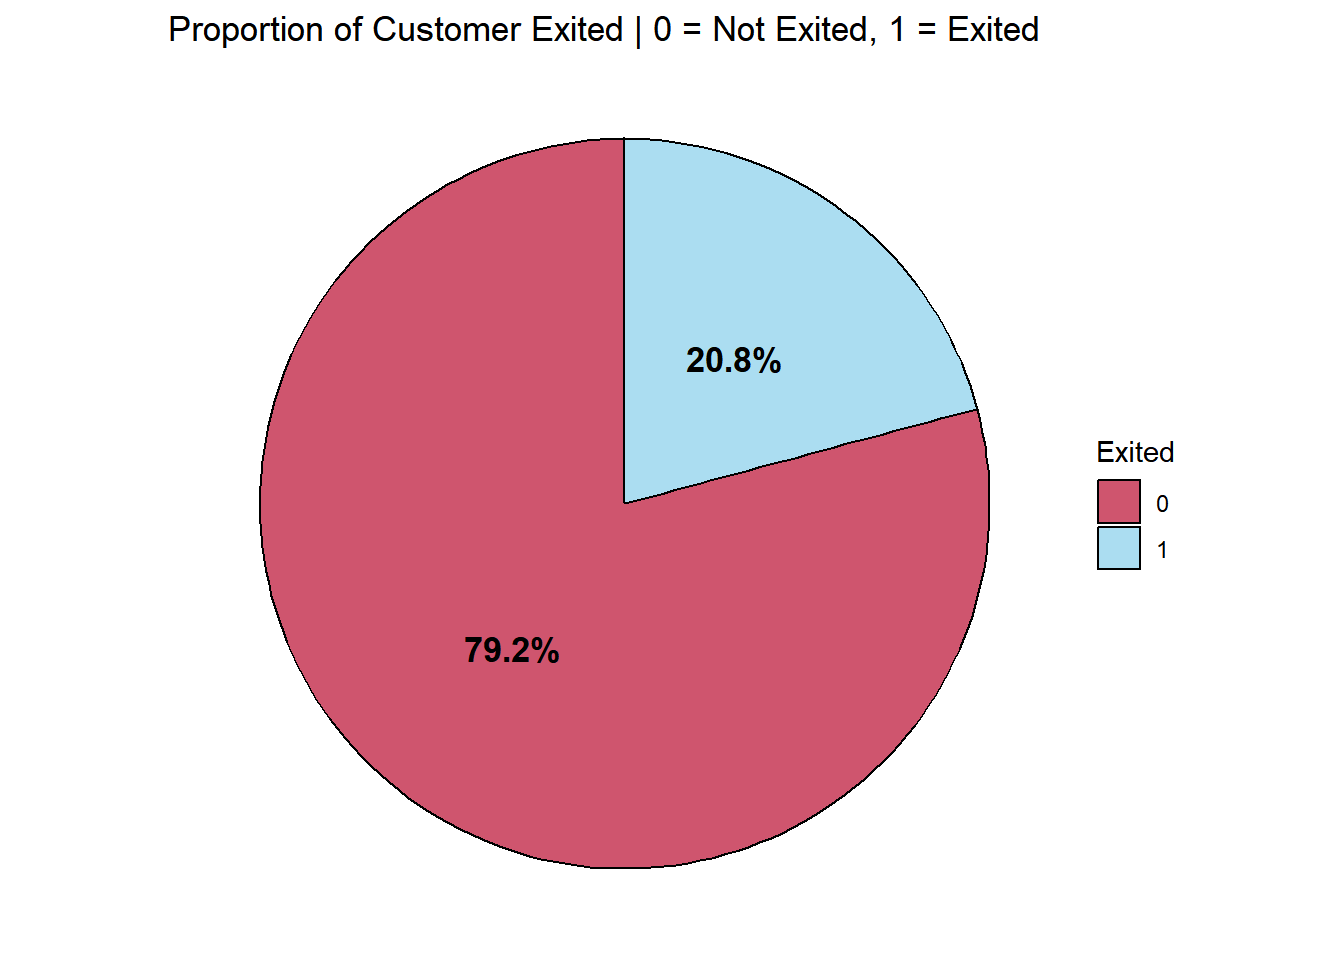

**Interpretation**: The pie chart shows the proportion of customers who
exited the bank (labeled as “1”) versus those who did not exit (labeled
as “0”). Approximately 79.2% of customers stayed with the bank, while
20.8% exited. This indicates that a relatively smaller portion of
customers left the bank, while the majority retained their accounts.

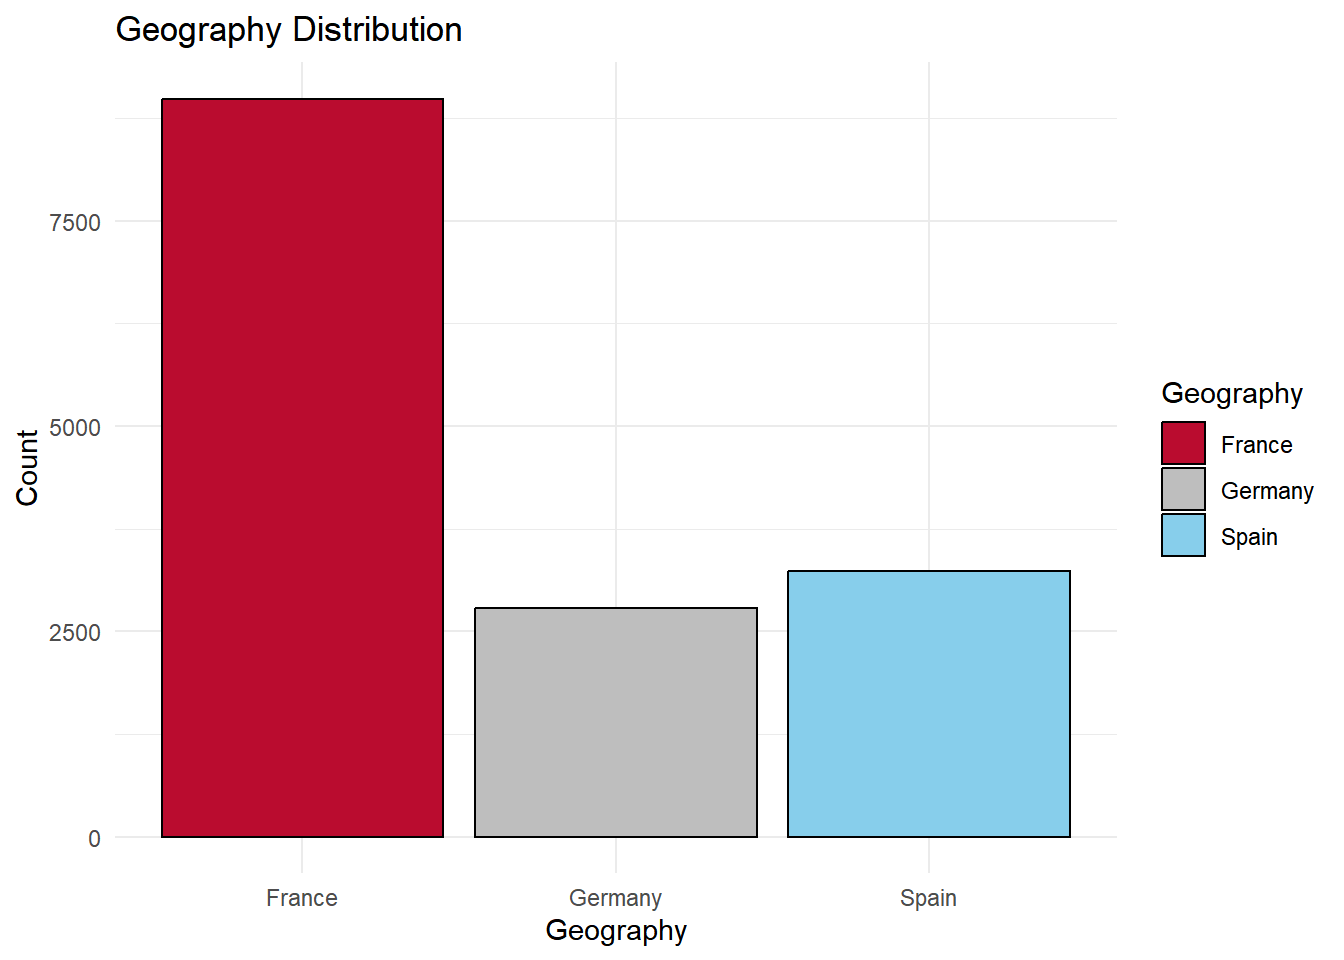

**Interpretation**: The bar chart displays the distribution of customers
by geography (France, Germany, and Spain). The majority of customers are
from France, with over 7,500 entries. Germany and Spain have
significantly fewer customers, with similar counts, both around 2,500.
This indicates that the dataset is predominantly composed of customers
from France, with fewer representations from Germany and Spain.

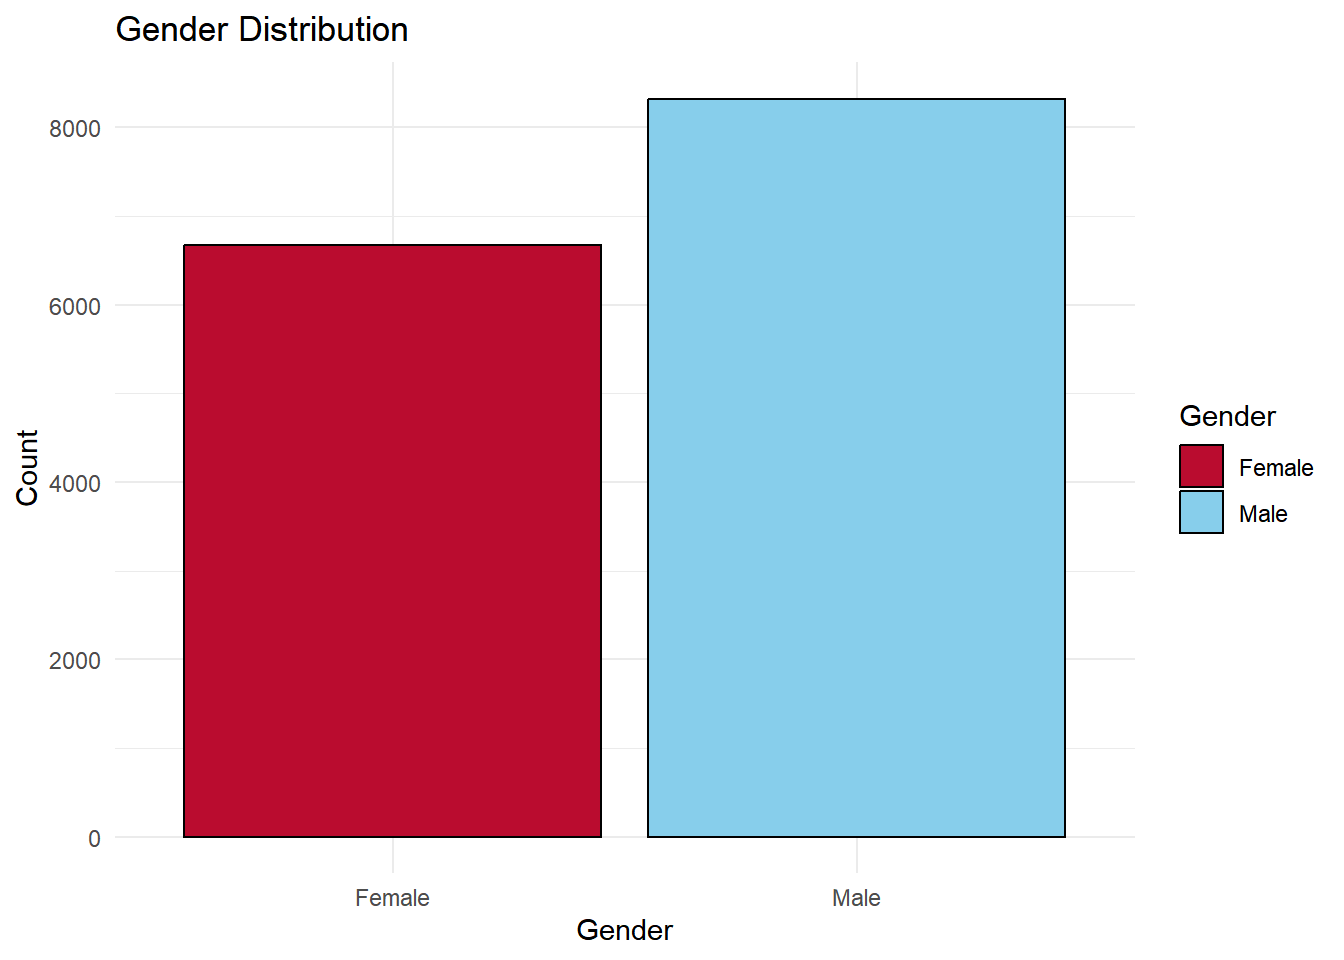

**Interpretation**: The bar chart illustrates the gender distribution in
the dataset. There are more male customers (around 8,000) compared to
female customers (around 6,000). This indicates a gender imbalance, with
a higher proportion of males in the dataset.

#### Summary Statistics:

Summary statistics are generated for continuous variables, and
individual histograms are plotted for Age, CreditScore, Balance, and
EstimatedSalary, and Tenure is plotted by boxplot . These visualizations
help understand the distribution of these variables in the dataset.

    ##   CreditScore         Age            Tenure          Balance       EstimatedSalary    
    ##  Min.   :431.0   Min.   :18.00   Min.   : 0.000   Min.   :     0   Min.   :     11.6  
    ##  1st Qu.:602.0   1st Qu.:32.00   1st Qu.: 3.000   1st Qu.:     0   1st Qu.:  82970.7  
    ##  Median :661.0   Median :37.00   Median : 5.000   Median :     0   Median : 123866.3  
    ##  Mean   :658.5   Mean   :37.84   Mean   : 5.094   Mean   : 42960   Mean   : 118001.6  
    ##  3rd Qu.:709.0   3rd Qu.:42.00   3rd Qu.: 7.000   3rd Qu.:110137   3rd Qu.: 156618.1  
    ##  Max.   :850.0   Max.   :74.00   Max.   :10.000   Max.   :205962   Max.   :1588781.5

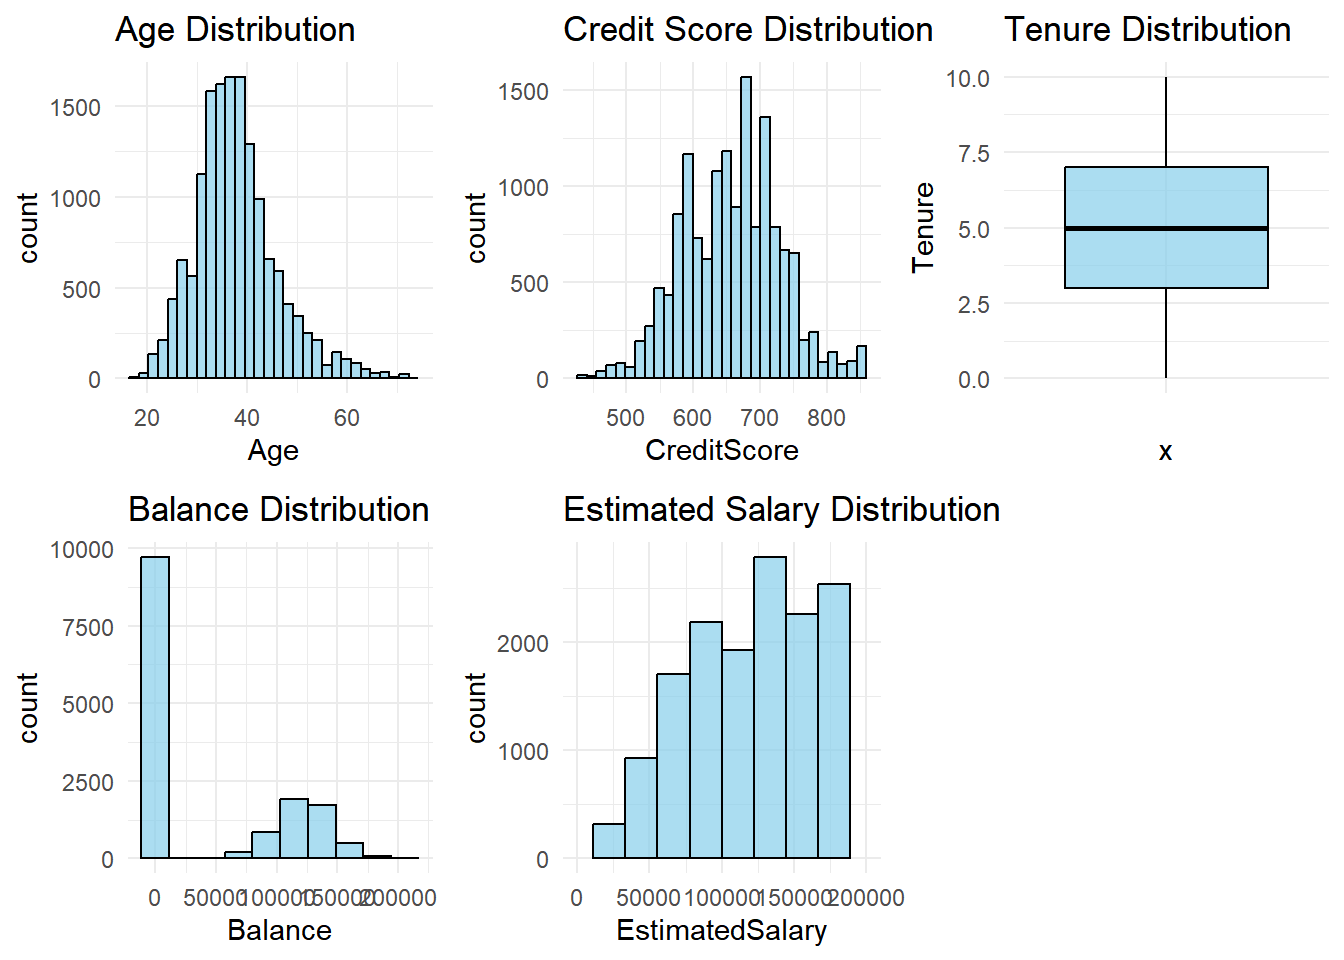

Most customers for this bank are between 32 and 42 years old and
middle-aged. Most of the bank’s customers have average or slightly
above-average credit scores, with the credit score between 602-709.
Customer tenure has central tendency from 2.7 to 7.3. For the balance,
the distribution is heavily skewed to the left due to the amount zero
values in the dataset. Customers have a wide range of income levels, but
there seems to be a concentration of customers in the middle-income
bracket, and sligthly right skewed.

**Spearman Correlation**: The **cor()** function is used to calculate
the Spearman correlation matrix, which measures the monotonic
relationship between the target variable (Exited) and other variables.
This method is suitable because Spearman correlation does not assume
linearity, making it appropriate for both continuous and ordinal
variables.

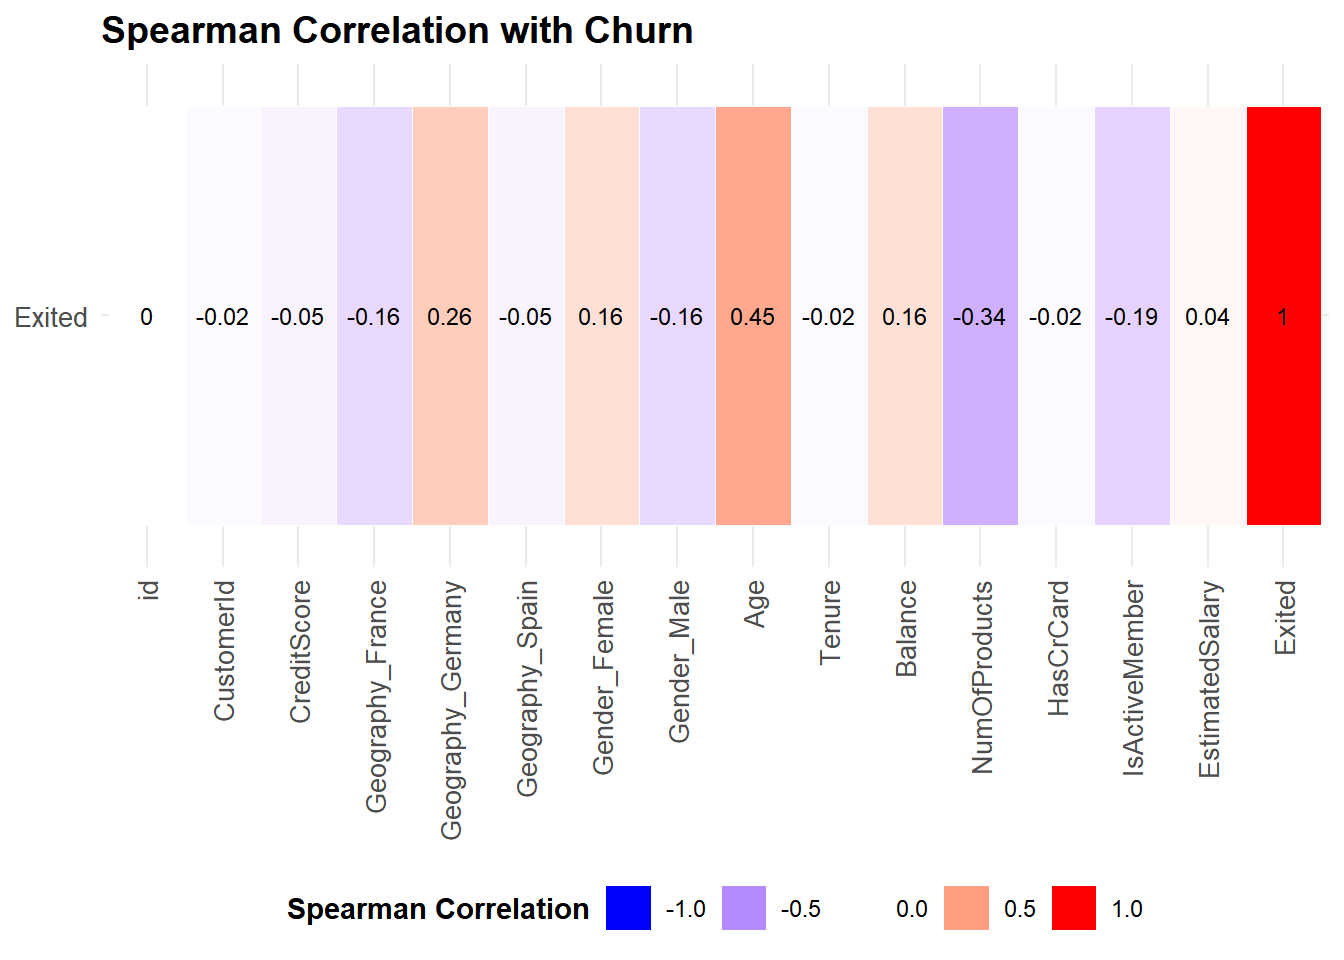

The aim of the correlation method is to evaluate both the strength and
direction of the linear relationship between two quantitative variables.
In this analysis, the relationship between all variables and the
“exited” variable is examined. Spearman correlation is used because it
does not require linearity, making it suitable for both continuous and
ordinal variables. The graph above shows the correlation between each
variable and customer churn. Age exhibits the strongest positive
correlation at 0.45, indicating that churn is more frequent among older
customers. While location-France has a weak negative correlation with
churn (-0.16), location-Germany has a moderate positive correlation
(0.26). Gender-wise, male customers show a tendency to stay loyal
(-0.16), whereas females are slightly more inclined to churn (0.16).
Higher balances correlate positively with churn (0.16), and the number
of products has a moderate negative correlation (-0.34). All other
variables show no correlation with churn.

# Model Selection: Logistic model

We choose logistic model for the prediction as our first method. Firstly
set of 1975 seeds for a randomized partition. Then we set up 80% for the
training data and the rest of 20% will become testing data for our final
model. Therefore, we can ensure that the AUC reported is not just a
result of over fitting but represents the model’s expected performance
on unseen data. We also created a grid of hyper parameters that will be
evaluated during cross-validation. Each combination of .alpha and.
Lambda will be tested to find the optimal model, and the best
combination minimizes over fitting and maximizes. We use the k-fold
cross-validation method for the model training process and set up k
equal to 10. This means the data will be split into 10 equal parts, and
the model will be trained and evaluated 10 times.

After all these steps we build a predictive model for the variable
Exited, using all relevant features in the dataset, excluding
CustomerId, cause it does not contribute to the prediction. And we
create our model by using “glmnet” method. “glmnet” refers to Elastic
net and is a combination of both Lasso and Ridge regularization.
Additionally, specifies “Center” and “scale” pre-processing steps
applied to the data before training the model. To ensure that all
features contribute equally to the model. And use the ROC indicator to
measure the model’s ability to distinguish categories. Finally,
“tuneGrid” helping find the optimal values for alpha and lambda that
lead to the best model performance.

    ## 'data.frame':    15000 obs. of  16 variables:
    ##  $ id               : num  0 1 2 3 4 5 6 7 8 9 ...
    ##  $ CustomerId       : num  15640163 15676576 15662494 15591036 15776733 ...
    ##  $ CreditScore      : num  593 757 775 550 648 585 669 705 739 755 ...
    ##  $ Geography_France : num  0 1 1 0 1 1 1 1 1 1 ...
    ##  $ Geography_Germany: num  1 0 0 0 0 0 0 0 0 0 ...
    ##  $ Geography_Spain  : num  0 0 0 1 0 0 0 0 0 0 ...
    ##  $ Gender_Female    : num  0 0 1 0 1 0 1 1 1 0 ...
    ##  $ Gender_Male      : num  1 1 0 1 0 1 0 0 0 1 ...
    ##  $ Age              : num  46 41 25 51 41 40 48 34 41 35 ...
    ##  $ Tenure           : num  9 4 3 1 9 8 2 5 3 7 ...
    ##  $ Balance          : num  121685 0 0 113935 0 ...
    ##  $ NumOfProducts    : num  2 2 2 1 2 2 1 2 2 1 ...
    ##  $ HasCrCard        : num  1 1 1 1 1 1 1 1 1 0 ...
    ##  $ IsActiveMember   : num  1 0 1 0 0 1 0 1 1 1 ...
    ##  $ EstimatedSalary  : num  138021 79477 160977 177092 149922 ...
    ##  $ Exited           : num  0 0 0 1 0 0 1 0 0 0 ...

    ## 
    ##     No    Yes 
    ## 0.7918 0.2082

    ## [1] "No"  "Yes"

    ##   alpha      lambda       ROC      Sens      Spec      ROCSD      SensSD     SpecSD
    ## 1     1 0.000000000 0.8773465 0.9542813 0.5465972 0.01266074 0.006852696 0.03087736
    ## 2     1 0.005025126 0.8771864 0.9593327 0.5171469 0.01267308 0.006354501 0.02955798
    ## 3     1 0.010050251 0.8758136 0.9626160 0.4902454 0.01261329 0.005046846 0.02583260
    ## 4     1 0.015075377 0.8748033 0.9648894 0.4675166 0.01280515 0.005136443 0.02679940
    ## 5     1 0.020100503 0.8746858 0.9678364 0.4415714 0.01299615 0.005670957 0.02627143
    ## 6     1 0.025125628 0.8741992 0.9700257 0.4156437 0.01327221 0.005028222 0.03028839

In Model Summary of the cross validation experiments, we can find the
logistic regression model without Lasso regularization (lambda = 0)
achieved the highest performance in terms of AUC with a value of
0.8773465. This suggests that in this particular case, the model
performs better without applying the Lasso penalty and increasing lambda
may have led to a drop.

    ## 15 x 1 sparse Matrix of class "dgCMatrix"
    ##                              s1
    ## (Intercept)       -2.025299e+00
    ## id                 .           
    ## CreditScore       -1.116441e-01
    ## Geography_France  -2.642899e-02
    ## Geography_Germany  6.507500e-01
    ## Geography_Spain    .           
    ## Gender_Female      3.775059e-01
    ## Gender_Male       -9.075490e-15
    ## Age                1.190967e+00
    ## Tenure            -6.301347e-02
    ## Balance           -3.376058e-01
    ## NumOfProducts     -7.251308e-01
    ## HasCrCard         -7.009433e-02
    ## IsActiveMember    -6.067546e-01
    ## EstimatedSalary    1.144535e-01

The objective of logistic regression is to predict the probability of a
binary outcome based on one or more independent variables, and
understand the impact of each predictor on the likelihood of the outcome
through its estimated coefficients. Logistic regression assumes a binary
outcome, a linear relationship between independent variables and
log-odds, independent observations, no multicollinearity among
predictors, and a sufficiently large sample size for reliable
estimation. This logistic regression output provides estimated
coefficients for predicting a binary outcome, likely customer churn. The
intercept (-2.025) represents the baseline log-odds of the outcome. A
higher CreditScore (-0.112) and Balance (-0.338) reduce the likelihood
of the event, while being from Germany (0.651) and older age (1.191)
significantly increase it. Gender_Female (0.378) is positively
associated with the event, whereas Tenure (-0.063) and being an Active
Member status (-0.607) slightly reduce the likelihood. The number of
products (-0.725) also significantly lowers the odds of the event, while
EstimatedSalary (0.114) has a minor positive effect. The most
influential factors are age, geography (Germany), and the number of
products.

    ##      logregPredictProb logregPredictClass
    ## [1,]        0.03344780                  1
    ## [2,]        0.06708127                  1
    ## [3,]        0.05242194                  1
    ## [4,]        0.17633605                  1
    ## [5,]        0.33695050                  1
    ## [6,]        0.37258789                  1

    ## logregPredictClass
    ##   No  Yes 
    ## 2577  422

    ## logregPredictClass
    ##        No       Yes 
    ## 0.8592864 0.1407136

    ## [1] "MAE:  0.128042680893631"

In this stage, We use the logistical Model we created for the remainder
20% of testing data. The result compare with the value between “No” and
“Yes” and choose the higher one to become the final Predict Class. The
final summary table shows 2577 customers will not leave the bank and 422
customers will leave. Since the predication results are too lengthy, we
had to present only first few rows of the result. The MAE value of
\~0.128 suggests the model’s predictions are reasonably accurate, with
an average error rate of around 12.8%

# Model Selection: Classification Tree (Postgraduate Student Only)

As our second method, we used the classification tree method for
prediction, starting with a randomized partition using 1,975 seeds. The
data was split into 80% for training and 20% for testing to ensure the
AUC reflects the model’s performance on unseen data. A grid of
hyperparameters was evaluated during 10-fold cross-validation to find
the optimal tree structure.

The predictive model for Exited was built using all relevant features,
excluding CustomerId. The tree algorithm created decision rules by
recursively splitting the data based on feature values. The ROC metric
was used to assess model performance.

    ##             cp       ROC      Sens     Spec       ROCSD     SensSD    SpecSD
    ## 2 0.0009847508 0.9044058 0.9544482 0.661219 0.007265171 0.00924652 0.0267713

From cross-validation, the best tree model achieved an AUC of 0.904,
indicating good predictive power with some potential for overfitting
that could be mitigated with complexity pruning.

    ##      classtreePredictProb classtreePredictClass
    ## [1,]           0.02348123                     1
    ## [2,]           0.02348123                     1
    ## [3,]           0.09700176                     1
    ## [4,]           0.14729646                     1
    ## [5,]           0.25000000                     1
    ## [6,]           0.87574468                     2

    ## classtreePredictClass
    ##   No  Yes 
    ## 2474  525

    ## classtreePredictClass
    ##        No       Yes 
    ## 0.8249416 0.1750584

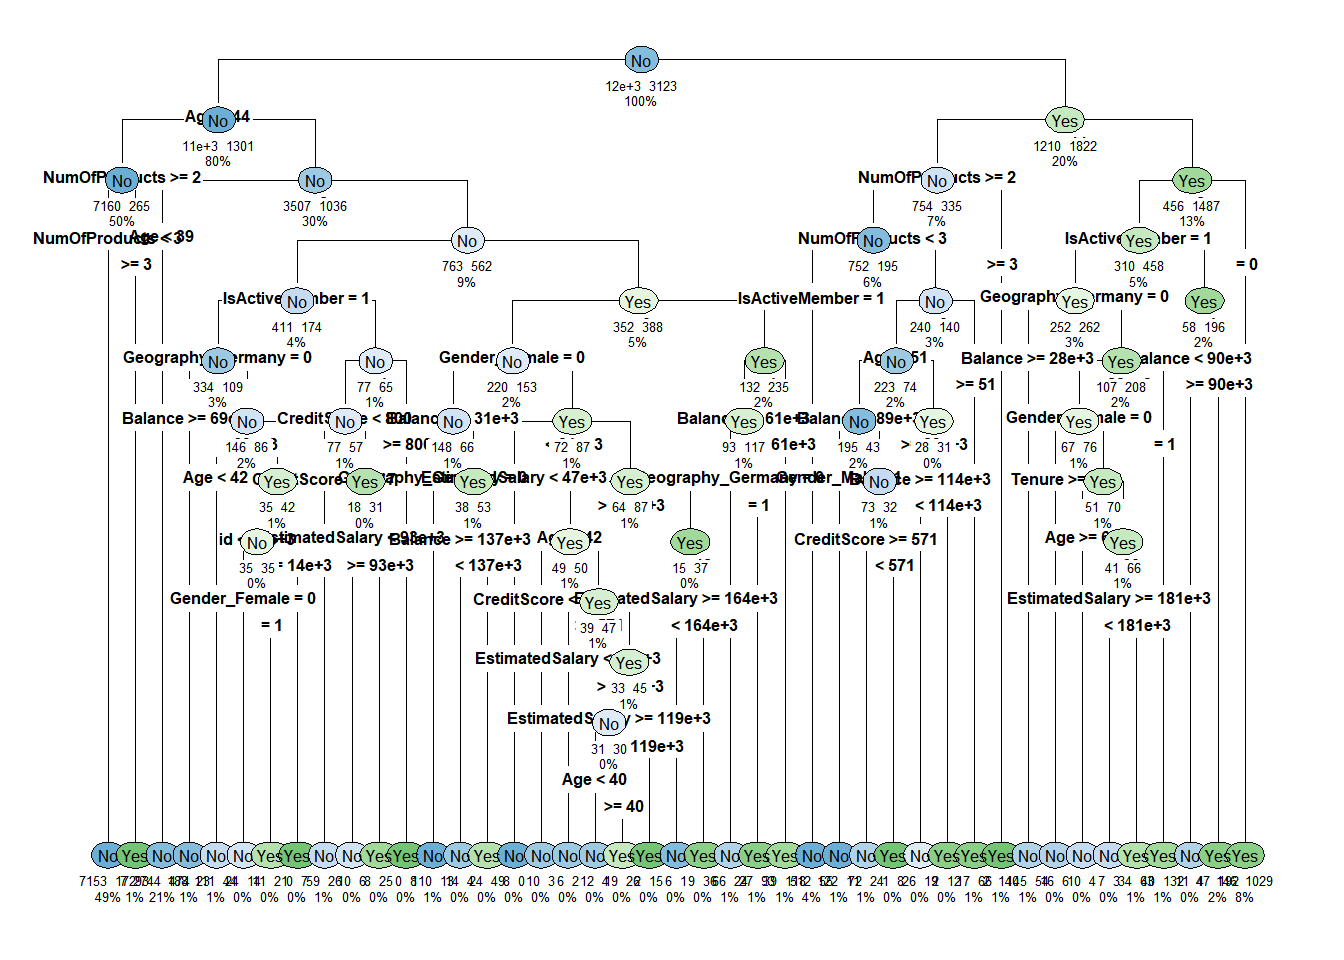

The objective of the classification tree method is to predict the class
of a target variable by recursively splitting the dataset into branches
based on feature values, aiming to improve classification accuracy. It
assumes independent observations, captures feature interactions through
splits, does not require linear relationships, seeks homogeneity within
nodes, and performs best when multicollinearity is minimal. With a
cutoff value of 0.5, predicted probabilities below 0.5 are classified as
“No,” meaning the event is unlikely to occur, while probabilities of 0.5
or higher are classified as “Yes,” indicating the event is likely. For
example, when Age is 39 to 44, NumOfProducts \< 2, and Balance \<
31,196, the predicted outcome of 0.00 is classified as “No,” while for
Age 44 to 51 and NumOfProducts 2 to 3, with a predicted probability of
0.86, the event is classified as “Yes.” Similarly, probabilities of 1.00
automatically result in a “Yes” classification.This insight could be
useful for targeting interventions or offering special incentives to
this customer segment to prevent churn, as they are at high risk of
leaving despite being active members with high credit scores.

# Discussion and Conclusion

    ## Confusion Matrix for Logistic Regression Model:

    ## Confusion Matrix and Statistics
    ## 
    ##           Reference
    ## Prediction   No  Yes
    ##        No  2284  293
    ##        Yes   91  331
    ##                                           
    ##                Accuracy : 0.872           
    ##                  95% CI : (0.8595, 0.8837)
    ##     No Information Rate : 0.7919          
    ##     P-Value [Acc > NIR] : < 2.2e-16       
    ##                                           
    ##                   Kappa : 0.5588          
    ##                                           
    ##  Mcnemar's Test P-Value : < 2.2e-16       
    ##                                           
    ##             Sensitivity : 0.5304          
    ##             Specificity : 0.9617          
    ##          Pos Pred Value : 0.7844          
    ##          Neg Pred Value : 0.8863          
    ##              Prevalence : 0.2081          
    ##          Detection Rate : 0.1104          
    ##    Detection Prevalence : 0.1407          
    ##       Balanced Accuracy : 0.7461          
    ##                                           
    ##        'Positive' Class : Yes             
    ## 

    ## 
    ## Confusion Matrix for Classification Tree Model:

    ## Confusion Matrix and Statistics
    ## 
    ##           Reference
    ## Prediction   No  Yes
    ##        No  2286  188
    ##        Yes   89  436
    ##                                           
    ##                Accuracy : 0.9076          
    ##                  95% CI : (0.8967, 0.9178)
    ##     No Information Rate : 0.7919          
    ##     P-Value [Acc > NIR] : < 2.2e-16       
    ##                                           
    ##                   Kappa : 0.7023          
    ##                                           
    ##  Mcnemar's Test P-Value : 3.903e-09       
    ##                                           
    ##             Sensitivity : 0.6987          
    ##             Specificity : 0.9625          
    ##          Pos Pred Value : 0.8305          
    ##          Neg Pred Value : 0.9240          
    ##              Prevalence : 0.2081          
    ##          Detection Rate : 0.1454          
    ##    Detection Prevalence : 0.1751          
    ##       Balanced Accuracy : 0.8306          
    ##                                           
    ##        'Positive' Class : Yes             
    ## 

#### Overall Comparison:

**First Model**: Logistic Regression

**Second Model**: Classification Tree

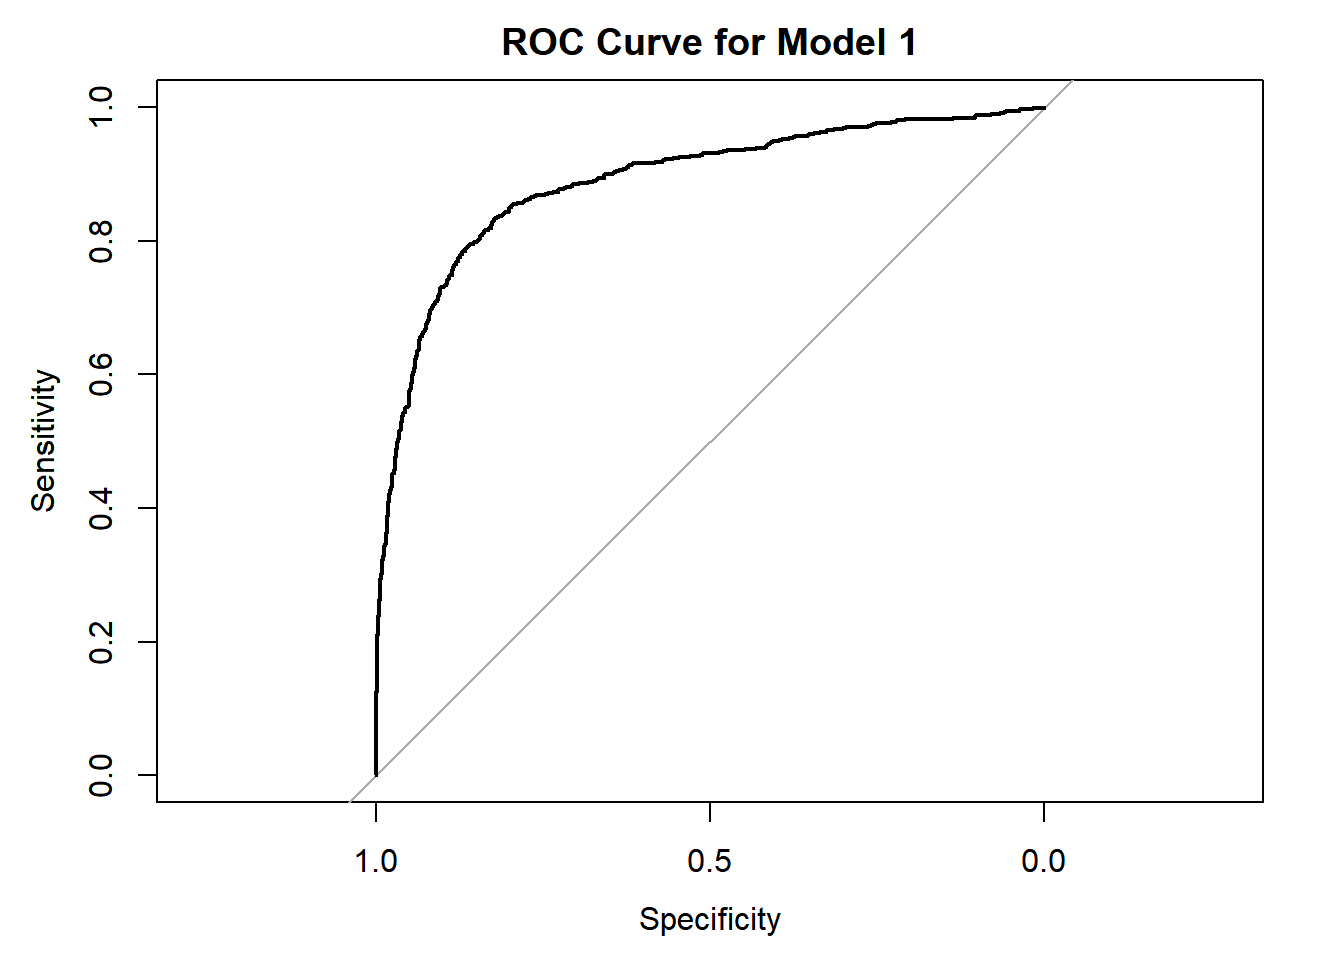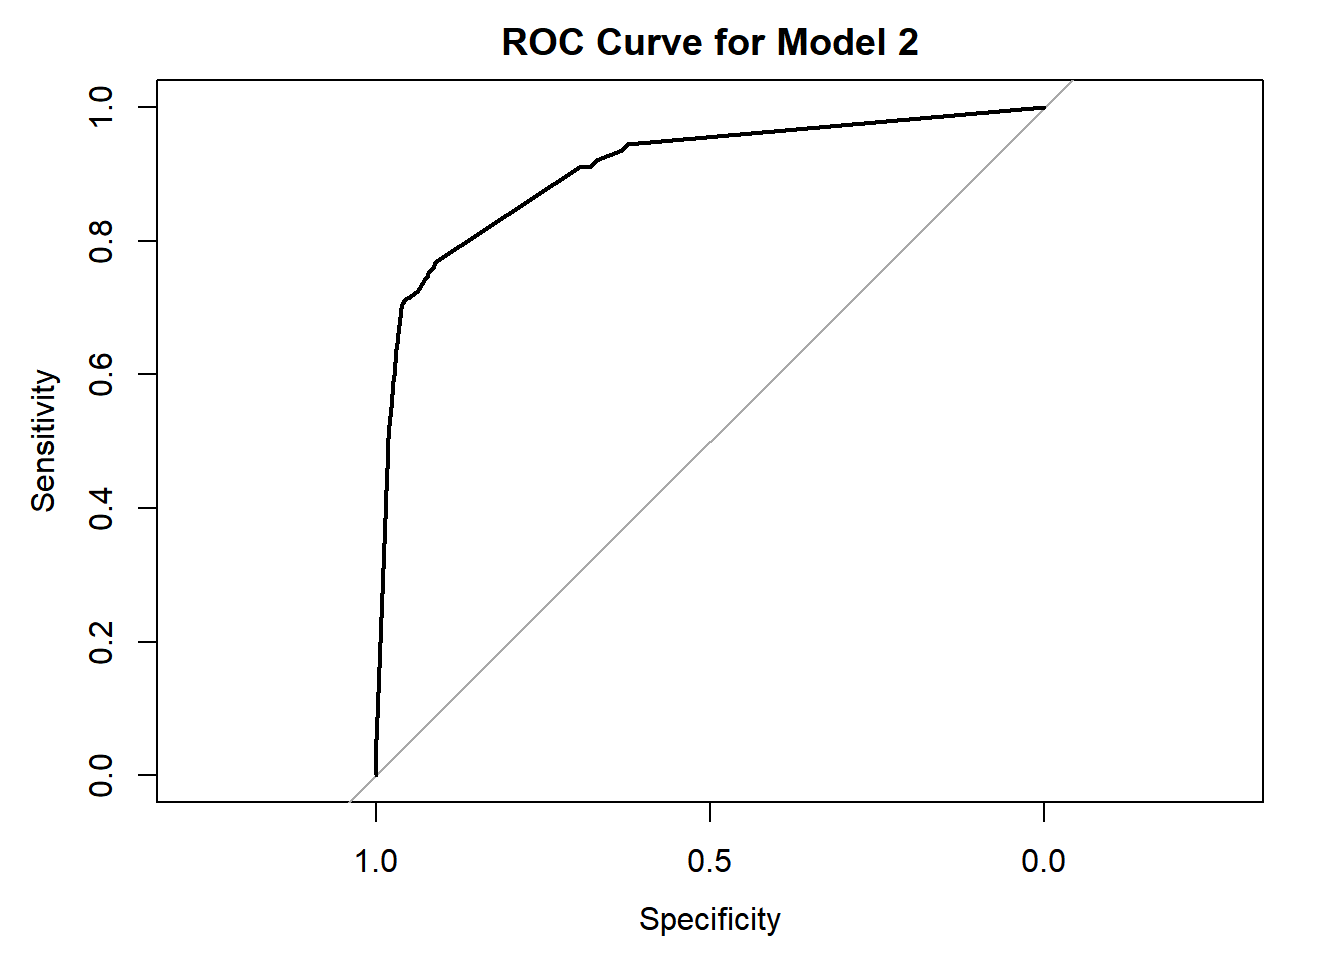

    ## Area under the curve: 0.8882

    ## Area under the curve: 0.9076

**Method 1**: The model shows an accuracy of 87.2% (95% CI: 85.95% to
88.37%), with strong specificity (96.17%) but moderate sensitivity
(53.04%), indicating it’s better at predicting “No” cases. The positive
predictive value is 78.44%, and the negative predictive value is 88.63%.
The Kappa statistic of 0.5588 suggests moderate agreement between
predicted and actual outcomes beyond chance. McNemar’s test, with a
p-value of \< 2.2e-16, indicates a significant difference between the
false positives and false negatives, meaning the model’s errors are not
evenly distributed. With a area under curve score of 88.82%, the model
performs well, but improving sensitivity would enhance positive case
detection.

**Method 2**: The model’s confusion matrix shows strong performance,
with an accuracy of 90.76% (95% CI: 89.67% to 91.78%). It has excellent
specificity (96.25%), correctly identifying 96.25% of “No” cases, and a
moderate sensitivity (69.87%), indicating it identifies 69.87% of “Yes”
cases. The positive predictive value (PPV) is 83.05%, meaning that most
“Yes” predictions are correct, while the negative predictive value (NPV)
is 92.40%, showing high accuracy in “No” predictions. The Kappa
statistic of 0.7023 indicates substantial agreement beyond chance.
McNemar’s test, with a p-value of 3.903e-09, suggests a significant
imbalance between false positives and false negatives. The model’s AUC
score is 90.76%, reflecting good overall performance, though there’s
still room for improvement in detecting positive cases.

**Conclusion**:

Method 2 performs better overall, with higher accuracy (90.76%
vs. 87.2%), improved sensitivity (69.87% vs. 53.04%), and similar
specificity (96.25% vs. 96.17%) compared to Method 1. It also has a
stronger Kappa value (0.7023 vs. 0.5588), indicating better agreement
between predicted and actual outcomes. Additionally, Method 2’s AUC
(0.9076) is higher than Method 1’s (0.8882), suggesting superior ability
to distinguish between positive and negative cases. Based on these
metrics, Method 2 demonstrates better overall performance and predictive
capability.

That is why we chose **Classification Tree** as our go to model for the
final prediction.

# References

**Kaggle Competition**

<https://www.kaggle.com/t/c0c9fcc6785347a38b5e6e508eb2f901>. (2024). Who
will leave the bank?

**dplyr** Wickham, H., François, R., Henry, L., & Müller, K. (2023).
dplyr: A Grammar of Data Manipulation. R package version 1.1.3.
<https://CRAN.R-project.org/package=dplyr>

**ggplot2** Wickham, H. (2016). ggplot2: Elegant Graphics for Data
Analysis. Springer-Verlag New York. <https://ggplot2.tidyverse.org>

**caret** Kuhn, M. (2023). caret: Classification and Regression
Training. R package version 6.0-94.
<https://CRAN.R-project.org/package=caret>

**pROC** Robin, X., Turck, N., Hainard, A., Tiberti, N., Lisacek, F.,
Sanchez, J.-C., & Müller, M. (2011). pROC: an open-source package for R
and S+ to analyze and compare ROC curves. BMC Bioinformatics, 12, 77.
<https://doi.org/10.1186/1471-2105-12-77>

**corrplot** Wei, T., & Simko, V. (2023). corrplot: Visualization of a
Correlation Matrix. R package version 0.92.
<https://CRAN.R-project.org/package=corrplot>

**rpart** Therneau, T., & Atkinson, B. (2023). rpart: Recursive
Partitioning and Regression Trees. R package version 4.1.19.
<https://CRAN.R-project.org/package=rpart>

**kableExtra** Zhu, H. (2023). kableExtra: Construct Complex Table with
‘kable’ and Pipe Syntax. R package version 1.3.4.
<https://CRAN.R-project.org/package=kableExtra>

**psych** Revelle, W. (2023). psych: Procedures for Personality and
Psychological Research. Northwestern University, Evanston, Illinois,
USA. <https://CRAN.R-project.org/package=psych>

**gridExtra** Auguie, B. (2017). gridExtra: Miscellaneous Functions for
“Grid” Graphics. R package version 2.3.
<https://CRAN.R-project.org/package=gridExtra>

**dummy** van der Loo, M. (2023). dummy: Create Dummy (Binary) Columns
from Categorical Variables. R package version 0.1.10.
<https://CRAN.R-project.org/package=dummy>

**reshape2** Wickham, H. (2007). Reshaping Data with the reshape
Package. Journal of Statistical Software, 21(12), 1-20.
<https://doi.org/10.18637/jss.v021.i12>

**rpart.plot** Milborrow, S. (2023). rpart.plot: Plot ‘rpart’ Models: An
Enhanced Version of ‘plot.rpart’. R package version 3.1.3.
<https://CRAN.R-project.org/package=rpart.plot>

**glmnet** Friedman, J., Hastie, T., & Tibshirani, R. (2010).
Regularization Paths for Generalized Linear Models via Coordinate
Descent. Journal of Statistical Software, 33(1), 1-22.
<https://doi.org/10.18637/jss.v033.i01>

**ROCR** Sing, T., Sander, O., Beerenwinkel, N., & Lengauer, T. (2005).
ROCR: visualizing classifier performance in R. Bioinformatics, 21(20),
3940-3941. <https://doi.org/10.1093/bioinformatics/bti623>

# Proof of Kaggle Competition Submission

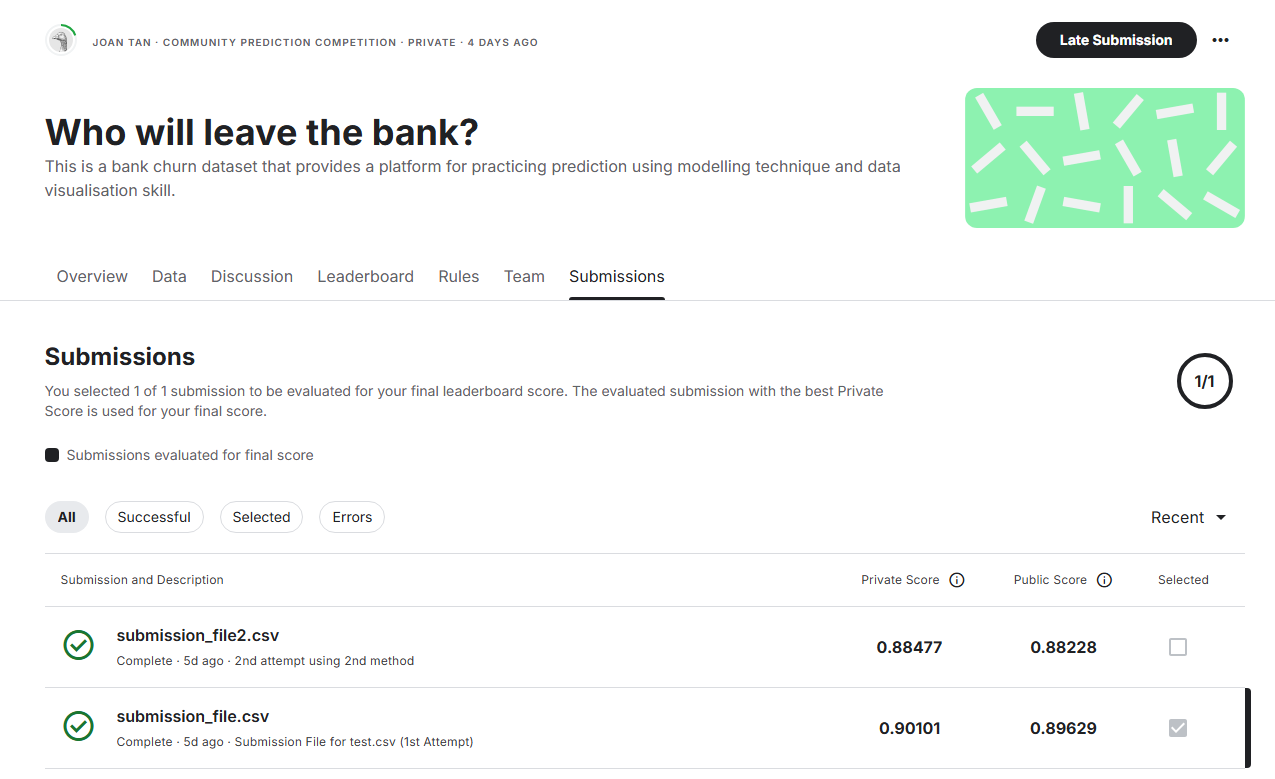

Proof of Kaggle Competition Submission

# Appendix

``` r
library(dplyr)
library(ggplot2)
library(caret)
library(pROC)
library(corrplot)
library(rpart)
library(kableExtra)
library(psych)
library(gridExtra)
library(dummy)
library(reshape2)
library(rpart.plot)
library(glmnet)
library(ROCR)

# Data Preprocessing:

## Checking for Missing Values
train_data <- read.csv("C:/Users/Tugg99/Documents/Semester 3/ETF 5912/ETF5912 Assignment 2/data/train.csv")

missing_values <- sum(is.na(train_data))
sum(missing_values)

## Dropping Unnecessary Columns
columns_to_drop <- c('Surname')
train_data <- train_data %>% select(-all_of(columns_to_drop))

## Converting Categorical Variables to Factors
train_data <- train_data %>%
  mutate(across(c(Geography, Gender), as.factor))

## Creating Dummy Variables (One-Hot Encoding) & Renaming Columns
dummy_train <- dummyVars(~ ., data = train_data, fullRank = FALSE)
train_data_encoded <- as.data.frame(predict(dummy_train, newdata = train_data))

colnames(train_data_encoded) <- gsub("\\.", "_", colnames(train_data_encoded))

## Displaying the First Few Rows
head(train_data_encoded)

# Calculate proportions
exited_prop <- prop.table(table(train_data_encoded$Exited))

# Convert to a data frame for ggplot
exited_df <- as.data.frame(exited_prop) %>%
  rename(Exited = Var1, Proportion = Freq) %>%
  mutate(Exited = as.factor(Exited),
         Label = paste0(round(Proportion * 100, 1), "%"))

# Create the pie chart
ggplot(exited_df, aes(x = "", y = Proportion, fill = Exited)) +
  geom_col(color = "black", width = 1, alpha = 0.7) +
  coord_polar(theta = "y") +  # Convert to pie chart
  geom_text(aes(label = Label), position = position_stack(vjust = 0.5), size = 4.5, fontface = "bold") +
  scale_fill_manual(values = c("#ba0c2f","#87CEEB")) +  # Custom colors
  theme_void() +  # Remove background and axes
  labs(
    title = "Proportion of Customer Exited | 0 = Not Exited, 1 = Exited",
    fill = "Exited"
  )

# Filter and count only the '1's for each Geography
geography_counts <- data.frame(
  Geography = c("France", "Germany", "Spain"),
  Count = c(sum(train_data_encoded$Geography_France == 1),
            sum(train_data_encoded$Geography_Germany == 1),
            sum(train_data_encoded$Geography_Spain == 1))
)

# Create the bar chart with specified colors for France and Spain
p <- ggplot(geography_counts, aes(x = Geography, y = Count, fill = Geography)) +
  geom_bar(stat = "identity", color = "black") +
  ggtitle("Geography Distribution") +
  xlab("Geography") +
  ylab("Count") +
  theme_minimal() +
  scale_fill_manual(values = c("France" = "#ba0c2f", "Germany" = "gray", "Spain" = "#87CEEB"))

p

# Filter and count the '1's for Gender_Female and Gender_Male
gender_counts <- data.frame(
  Gender = c("Female", "Male"),
  Count = c(sum(train_data_encoded$Gender_Female == 1),
            sum(train_data_encoded$Gender_Male == 1))
)

# Create the bar chart
p1 <- ggplot(gender_counts, aes(x = Gender, y = Count, fill = Gender)) +
  geom_bar(stat = "identity", color = "black") +
  ggtitle("Gender Distribution") +
  xlab("Gender") +
  ylab("Count") +
  theme_minimal() +
  scale_fill_manual(values = c("Female" = "#ba0c2f", "Male" = "#87CEEB"))

p1

# Summary statistics
# Exclude binary variables and specific variables: id, CustomerId, NumOfProducts
non_binary_vars <- train_data_encoded[, sapply(train_data_encoded, function(x) length(unique(x)) > 2)]

# Exclude specific variables: id, CustomerId, NumOfProducts
non_binary_vars <- non_binary_vars[, !names(non_binary_vars) %in% c("id", "CustomerId", "NumOfProducts")]

# Generate a summary of the remaining non-binary variables
options(width = 120)  # Increase width to fit more columns
summary(non_binary_vars)

# Create individual histograms
p1 <- ggplot(train_data_encoded, aes(x = Age)) +
  geom_histogram(bins = 30, fill = 'skyblue', color = 'black', alpha = 0.7) +
  ggtitle('Age Distribution') +
  theme_minimal()

p2 <- ggplot(train_data_encoded, aes(x = CreditScore)) +
  geom_histogram(bins = 30, fill = 'skyblue', color = 'black', alpha = 0.7) +
  ggtitle('Credit Score Distribution') +
  theme_minimal()

p3 <- ggplot(train_data_encoded, aes(x = "", y = Tenure)) +
  geom_boxplot(fill = 'skyblue', color = 'black', alpha = 0.7) +
  ggtitle('Tenure Distribution') +
  theme_minimal()

p4 <- ggplot(train_data_encoded, aes(x = Balance)) +
  geom_histogram(bins = 10, fill = 'skyblue', color = 'black', alpha = 0.7) +
  ggtitle('Balance Distribution') +
  theme_minimal()

p5 <- ggplot(train_data_encoded, aes(x = EstimatedSalary)) +
  geom_histogram(bins = 10, fill = 'skyblue', color = 'black', alpha = 0.7) +
  ggtitle('Estimated Salary Distribution') +
  theme_minimal() + xlim(0, 200000)

# Arrange the plots in a 2x2 grid layout
grid.arrange(p1, p2, p3, p4, p5, ncol = 3)

# Calculate Spearman correlation matrix for all features including 'Exited'
cor_matrix <- round(cor(train_data_encoded, method = "spearman", use = "complete.obs"), 2)

# Filter only correlations of the target variable 'Exited' with all other features
churn_correlations <- cor_matrix[,"Exited", drop = FALSE]

# Melt the correlation data for easy visualization
melted_cor <- melt(churn_correlations)

# Create the plot
ggplot(data = melted_cor, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name="Spearman Correlation") +
  geom_text(aes(label = value), color = "black", size = 3) +
  ggtitle("Spearman Correlation with Churn") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),  # Rotate x-axis labels
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    strip.background = element_rect(fill = "white", color = "white"),
    strip.text = element_text(colour = 'black', face = "bold"),
    legend.title = element_text(face = "bold"),
    plot.title = element_text(face = "bold", size = 14),
    axis.text = element_text(size = 10),
    legend.position = "bottom"  # Position legend at the bottom like the previous visualization
  ) +
  guides(fill = guide_legend(title = "Spearman Correlation"))

# Logistic Model
# review encoding of variables
# input variables need to be numerically encoded
str(train_data_encoded)

# encode target variable as a categorical variable
train_data_encoded$Exited <- factor(train_data_encoded$Exited, 
                                    levels = c(0, 1), 
                                    labels = c("No", "Yes"))

# compute class proportion table on target variable
prop.table(table(train_data_encoded$Exited))

# order levels of categorical target variables
# so class of interest (positive class) is listed first
levels(train_data_encoded$Exited)

train_data$Exited <- factor(train_data_encoded$Exited, levels=rev(levels(train_data$Exited)))

# set random number seed for randomized partition
# different seed values will generate different partitions of the data
set.seed(1975)

# use the createDataPartition to randomly select observations to be placed in the training set
# specify the target variable (y)
# set the percentage of data to set aside for training (p)
indxTrain <- createDataPartition(y = train_data_encoded$Exited, p=0.8, list=FALSE)

# define training set for cross-validation
training <- train_data_encoded[indxTrain,]

# define test set 
testing <- train_data_encoded[-indxTrain,]

# create a grid of parameter values to assess in k-fold cross-validation
# for regularized logistic regression, two parameters: alpha and lambda
# alpha parameter controls the mix between ridge regularization and lasso regularization
# alpha = 0 -> ridge, alpha = 1 -> lasso
# lambda corresponds to the regularization penalty that dampens the size of the coefficients
grid <- expand.grid(.alpha=1:1, .lambda = seq(0, 1, length = 200))

# specify model training process
# method = k-fold cross-validation 
# number = number of folds
ctrl <- trainControl(method = "cv", 
                     number = 10, 
                     classProbs = TRUE, 
                     summaryFunction = twoClassSummary, 
                     savePredictions = 'final')

# train model via 10-fold cross-validation
# first argument identifies y variable (before the ~) and the set of x variables (after the ~)
# note we are excluding the Store index variable 
# second argument (data) specifies training set 
# third argument (method) specifies prediction method (regularized logistic regression)
# fourth argument (trControl) specifies training process (cross-validation)
# fifth argument (preProcess) specifies that we need to center and scale variables
# sixth argument (metric) specifies the metric used to evaluate predictive performance
# seventh argument (tuneGrid) specifies number of different combinations of the two parameters
# alpha and lambda to evaluate, the specific values of alpha and lambda are selected automatically
# alpha parameter controls the mix between ridge regularization and lasso regularization
# alpha = 0 -> ridge, alpha = 1 -> lasso
# lambda corresponds to the regularization penalty that dampens the size of the coefficients
logregFit <- train(Exited ~ . - CustomerId, 
                   data = train_data_encoded, 
                   method = "glmnet",
                   trControl = ctrl, 
                   preProcess = c("center","scale"), 
                   metric="ROC",  
                   tuneGrid = grid)

# summary of the model
head(logregFit$results)

coef(logregFit$finalModel, logregFit$bestTune$lambda)

logregPredictClass <- predict(logregFit,newdata = testing)

logregPredictProb <- predict(logregFit, newdata = testing, type = "prob")[,2]  

df_test <- cbind(logregPredictProb, logregPredictClass)
head(df_test)


table(logregPredictClass)


prop.table(table(logregPredictClass))

# Actual values from test set
actual_exited <- ifelse(testing$Exited == "Yes", 1,0)
predicted_exited <- ifelse(logregPredictClass == "Yes", 1,0)
# Convert factor predictions to numeric (0 and 1 for "No" and "Yes")
predictions_numeric <- as.numeric(predicted_exited) - 1
actual_numeric <- as.numeric(actual_exited) - 1

mae_value <- mean(abs(actual_numeric - predictions_numeric))
print(paste("MAE: ", mae_value))

#Classification Tree

classtreeFit <- train(Exited ~ . - CustomerId, 
                      data = train_data_encoded, 
                      method = "rpart", 
                      trControl = ctrl, 
                      tuneLength = 200, metric="ROC")

# list output
classtreeFit$results[classtreeFit$results$ROC == max(classtreeFit$results$ROC), ]

# generate classifications on testing set using threshold of 0.5
classtreePredictClass <- predict(classtreeFit, newdata = testing)

# generate predicted probabilities on testing set
classtreePredictProb <- predict(classtreeFit, newdata = testing, type = "prob")[,2]  

# create and list a data frame with the probability estimates and test set observations

df2_test <- cbind(classtreePredictProb, classtreePredictClass)
head(df2_test)

table(classtreePredictClass)


prop.table(table(classtreePredictClass))

# Actual values from test set
actual_exited2 <- ifelse(testing$Exited == "Yes", 1,0)
predicted_exited2 <- ifelse(classtreePredictClass == "Yes", 1,0)
# Convert factor predictions to numeric (0 and 1 for "No" and "Yes")
predictions_numeric2 <- as.numeric(predicted_exited2) - 1
actual_numeric2 <- as.numeric(actual_exited2) - 1

rpart.plot(classtreeFit$finalModel, type = 4, extra = 101, under = TRUE, cex = 0.5, tweak = 1)

# Confusion Matrix 

# output performance metrics using "Yes" as the positive class
# using 50% probability threshold
# Logistic Regression Confusion Matrix with Title
cat("Confusion Matrix for Logistic Regression Model:\n")
confusionMatrix(logregPredictClass, testing$Exited, positive = "Yes")

# Classification Tree Confusion Matrix with Title
cat("\nConfusion Matrix for Classification Tree Model:\n")
confusionMatrix(classtreePredictClass, testing$Exited, positive = "Yes")

# Roc Curves for Both Model 

roc_curve_model1 <- roc(actual_exited, logregPredictProb, quiet = TRUE)
plot(roc_curve_model1, main="ROC Curve for Model 1")

roc_curve_model2 <- roc(actual_exited2, classtreePredictProb, quiet = TRUE)
plot(roc_curve_model2, main="ROC Curve for Model 2")

auc(roc_curve_model1)
auc(roc_curve_model2)


# Submission File 

test_real <- read.csv("C:/Users/Tugg99/Documents/Semester 3/ETF 5912/ETF5912 Assignment 2/data/test.csv")

# Drop unnecessary columns
columns_to_drop <- c('Surname')
test_real <- test_real %>% select(-all_of(columns_to_drop))

# Convert categorical variables to factors in train and test data
test_real <- test_real %>%
  mutate(across(c(Geography, Gender), as.factor))

# Use the caret package to create dummy variables (one-hot encoding)
dummy_train <- dummyVars(~ ., data = test_real, fullRank = FALSE)
test_real_encoded <- as.data.frame(predict(dummy_train, newdata = test_real))

# Rename columns to have the desired format (Geography_Level, Gender_Level)
colnames(test_real_encoded) <- gsub("\\.", "_", colnames(test_real_encoded))

# Predict on test data
test_real_encoded$Exited <- predict(classtreeFit, test_real_encoded, type = "prob")[,2]

# Prepare the submission file
submission <- test_real_encoded %>%
  select(id, Exited)

write.csv(submission, 'submission_file1.csv', row.names = FALSE)
```